pip install pandas numpy matplotlib scikit-learn tensorflow yfinance
pandas for data manipulation.
numpy for numerical operations.
matplotlib for plotting.
scikit-learn for machine learning algorithms.
tensorflow (optional) for more advanced ML models (if needed).
yfinance for downloading historical Bitcoin data.

Download Bitcoin data using yfinance

In [ ]:
import yfinance as yf

# Download historical data for Bitcoin (BTC)
btc_data = yf.download("BTC-USD", start="2020-01-01", end="2025-01-01", interval="1d")
btc_data.to_csv("bitcoin_data.csv")


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Load the dataset into a DataFrame

In [ ]:
import pandas as pd

# Load the data into a DataFrame
btc_data = pd.read_csv("bitcoin_data.csv", header=1)  # This will skip the first row as headers if needed
print(btc_data.head())


       Ticker      BTC-USD    BTC-USD.1    BTC-USD.2    BTC-USD.3  \
0        Date          NaN          NaN          NaN          NaN   
1  2020-01-01  7200.174316  7254.330566  7174.944336  7194.892090   
2  2020-01-02  6985.470215  7212.155273  6935.270020  7202.551270   
3  2020-01-03  7344.884277  7413.715332  6914.996094  6984.428711   
4  2020-01-04  7410.656738  7427.385742  7309.514160  7345.375488   

      BTC-USD.4  
0           NaN  
1  1.856566e+10  
2  2.080208e+10  
3  2.811148e+10  
4  1.844427e+10  


In [ ]:
# Manually rename the columns
btc_data.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
print(btc_data.head())


         Date        Close         High          Low         Open  \
0        Date          NaN          NaN          NaN          NaN   
1  2020-01-01  7200.174316  7254.330566  7174.944336  7194.892090   
2  2020-01-02  6985.470215  7212.155273  6935.270020  7202.551270   
3  2020-01-03  7344.884277  7413.715332  6914.996094  6984.428711   
4  2020-01-04  7410.656738  7427.385742  7309.514160  7345.375488   

         Volume  
0           NaN  
1  1.856566e+10  
2  2.080208e+10  
3  2.811148e+10  
4  1.844427e+10  


In [ ]:
# #  Drop the first row (index=0) that contains "Ticker" and other non-relevant data:
# btc_data = btc_data.drop(index=0)
# print(btc_data.head())



         Date        Close         High          Low         Open  \
1  2020-01-01  7200.174316  7254.330566  7174.944336  7194.892090   
2  2020-01-02  6985.470215  7212.155273  6935.270020  7202.551270   
3  2020-01-03  7344.884277  7413.715332  6914.996094  6984.428711   
4  2020-01-04  7410.656738  7427.385742  7309.514160  7345.375488   
5  2020-01-05  7411.317383  7544.497070  7400.535645  7410.451660   

         Volume  
1  1.856566e+10  
2  2.080208e+10  
3  2.811148e+10  
4  1.844427e+10  
5  1.972507e+10  


Perform exploratory data analysis (EDA)

In [ ]:
# # Check for missing values
# print(btc_data.isnull().sum())



Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


In [ ]:
# # Remove any extra spaces from column names
# btc_data.columns = btc_data.columns.str.strip() 
# print(btc_data.columns)
# print(btc_data.head())



Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
         Date        Close         High          Low         Open  \
1  2020-01-01  7200.174316  7254.330566  7174.944336  7194.892090   
2  2020-01-02  6985.470215  7212.155273  6935.270020  7202.551270   
3  2020-01-03  7344.884277  7413.715332  6914.996094  6984.428711   
4  2020-01-04  7410.656738  7427.385742  7309.514160  7345.375488   
5  2020-01-05  7411.317383  7544.497070  7400.535645  7410.451660   

         Volume  
1  1.856566e+10  
2  2.080208e+10  
3  2.811148e+10  
4  1.844427e+10  
5  1.972507e+10  


Convert Data Types

In [ ]:
# # Convert 'Date' to datetime
# btc_data['Date'] = pd.to_datetime(btc_data['Date'], errors='coerce')

# # Convert columns to numeric
# btc_data['Close'] = pd.to_numeric(btc_data['Close'], errors='coerce')
# btc_data['High'] = pd.to_numeric(btc_data['High'], errors='coerce')
# btc_data['Low'] = pd.to_numeric(btc_data['Low'], errors='coerce')
# btc_data['Open'] = pd.to_numeric(btc_data['Open'], errors='coerce')
# btc_data['Volume'] = pd.to_numeric(btc_data['Volume'], errors='coerce')


# print(btc_data.head())

        Date        Close         High          Low         Open        Volume
1 2020-01-01  7200.174316  7254.330566  7174.944336  7194.892090  1.856566e+10
2 2020-01-02  6985.470215  7212.155273  6935.270020  7202.551270  2.080208e+10
3 2020-01-03  7344.884277  7413.715332  6914.996094  6984.428711  2.811148e+10
4 2020-01-04  7410.656738  7427.385742  7309.514160  7345.375488  1.844427e+10
5 2020-01-05  7411.317383  7544.497070  7400.535645  7410.451660  1.972507e+10


                                Date          Close           High  \
count                           1827    1827.000000    1827.000000   
mean   2022-07-02 00:00:00.000000256   36317.361552   37071.334190   
min              2020-01-01 00:00:00    4970.788086    5331.833984   
25%              2021-04-01 12:00:00   19620.197266   20118.541992   
50%              2022-07-02 00:00:00   32186.277344   33327.101562   
75%              2023-10-01 12:00:00   50716.017578   51901.730469   
max              2024-12-31 00:00:00  106140.601562  108268.445312   
std                              NaN   21119.797067   21561.461651   

                 Low           Open        Volume  
count    1827.000000    1827.000000  1.827000e+03  
mean    35445.250272   36272.665626  3.317871e+10  
min      4106.980957    5002.578125  5.331173e+09  
25%     19246.264648   19594.292969  2.060609e+10  
50%     31030.265625   32138.873047  2.993834e+10  
75%     49072.609375   50673.753906  4.018169e+10  
max  

<Axes: title={'center': 'Bitcoin Price over Time'}>

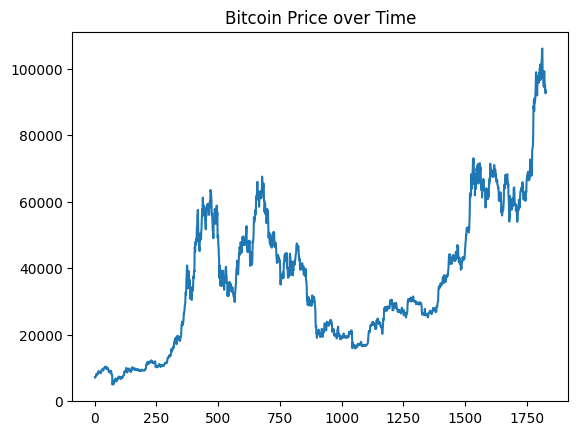

In [ ]:
#  # Summary statistics
# print(btc_data.describe()) 
# btc_data['Close'].plot(title='Bitcoin Price over Time')


Feature Engineering: You can create new features, such as:

Moving averages (e.g., 7-day, 30-day).

In [ ]:
# btc_data['MA7'] = btc_data['Close'].rolling(window=7).mean()
# btc_data['MA30'] = btc_data['Close'].rolling(window=30).mean()

# print(btc_data.head(20))
# print(btc_data.isna().sum())

         Date        Close         High          Low         Open  \
1  2020-01-01  7200.174316  7254.330566  7174.944336  7194.892090   
2  2020-01-02  6985.470215  7212.155273  6935.270020  7202.551270   
3  2020-01-03  7344.884277  7413.715332  6914.996094  6984.428711   
4  2020-01-04  7410.656738  7427.385742  7309.514160  7345.375488   
5  2020-01-05  7411.317383  7544.497070  7400.535645  7410.451660   
6  2020-01-06  7769.219238  7781.867188  7409.292969  7410.452148   
7  2020-01-07  8163.692383  8178.215820  7768.227539  7768.682129   
8  2020-01-08  8079.862793  8396.738281  7956.774414  8161.935547   
9  2020-01-09  7879.071289  8082.295898  7842.403809  8082.295898   
10 2020-01-10  8166.554199  8166.554199  7726.774902  7878.307617   
11 2020-01-11  8037.537598  8218.359375  8029.642090  8162.190918   
12 2020-01-12  8192.494141  8200.063477  8009.059082  8033.261719   
13 2020-01-13  8144.194336  8197.788086  8079.700684  8189.771973   
14 2020-01-14  8827.764648  8879.5

In [ ]:
# # Fill NaN values with the mean of the column
# btc_data['MA7'] = btc_data['MA7'].fillna(btc_data['MA7'].mean())
# btc_data['MA30'] = btc_data['MA30'].fillna(btc_data['MA30'].mean())


# # Check if NaN values are resolved
# print(btc_data.isna().sum())


Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
MA7       0
MA30      0
dtype: int64


Improving the Model with More Features
RSI (Relative Strength Index): A common technical indicator used in trading to measure the magnitude of recent price changes.

In [ ]:
# # Calculate RSI (Relative Strength Index)
# delta = btc_data['Close'].diff()
# gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
# loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
# rs = gain / loss
# btc_data['RSI'] = 100 - (100 / (1 + rs))

# btc_data['RSI'] = btc_data['RSI'].fillna(btc_data['RSI'].mean())

# print(btc_data.isna().sum())


Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
MA7       0
MA30      0
RSI       0
dtype: int64


Building the Trading Model 
Simple Rule-based Approach
Create a basic trading strategy using simple rules (e.g., buy if the price goes above the moving average, sell if it goes below).

In [ ]:
# btc_data['Signal'] = 0  # Default
# btc_data.loc[btc_data['Close'] > btc_data['MA7'], 'Signal'] = 1  # Buy signal
# btc_data.loc[btc_data['Close'] < btc_data['MA7'], 'Signal'] = -1  # Sell signal


Machine Learning Approach
You can train a machine learning model to predict Bitcoin price movements based on historical data. For this, you can use a simple classifier like Logistic Regression
    .MA60, MA200, EMA12, EMA26: Additional moving averages to capture different timeframes.
    .MACD, MACD_signal: The Moving Average Convergence Divergence and its signal line.
    .Bollinger_Mid, Bollinger_Upper, Bollinger_Lower: The midline, upper, and lower Bollinger Bands.
    .ATR: The Average True Range, which captures volatility.
    .ROC: The Rate of Change, which helps measure price momentum.
    .Momentum: A feature that indicates the price change over a specific period.

In [ ]:
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# from sklearn.preprocessing import StandardScaler
# from imblearn.over_sampling import SMOTE

# # Feature Engineering: Adding additional features

# # Moving Averages
# btc_data['MA60'] = btc_data['Close'].rolling(window=60).mean()
# btc_data['MA200'] = btc_data['Close'].rolling(window=200).mean()

# # Exponential Moving Averages (EMA)
# btc_data['EMA12'] = btc_data['Close'].ewm(span=12, adjust=False).mean()
# btc_data['EMA26'] = btc_data['Close'].ewm(span=26, adjust=False).mean()

# # Moving Average Convergence Divergence (MACD)
# btc_data['MACD'] = btc_data['EMA12'] - btc_data['EMA26']
# btc_data['MACD_signal'] = btc_data['MACD'].rolling(window=9).mean()

# # Bollinger Bands
# btc_data['Bollinger_Mid'] = btc_data['Close'].rolling(window=20).mean()
# btc_data['Bollinger_Upper'] = btc_data['Bollinger_Mid'] + (btc_data['Close'].rolling(window=20).std() * 2)
# btc_data['Bollinger_Lower'] = btc_data['Bollinger_Mid'] - (btc_data['Close'].rolling(window=20).std() * 2)

# # Average True Range (ATR)
# high_low = btc_data['High'] - btc_data['Low']
# high_close = abs(btc_data['High'] - btc_data['Close'].shift())
# low_close = abs(btc_data['Low'] - btc_data['Close'].shift())
# true_range = pd.concat([high_low, high_close, low_close], axis=1)
# btc_data['ATR'] = true_range.max(axis=1).rolling(window=14).mean()

# # Rate of Change (ROC)
# btc_data['ROC'] = (btc_data['Close'] - btc_data['Close'].shift(12)) / btc_data['Close'].shift(12) * 100

# # Momentum Indicator
# btc_data['Momentum'] = btc_data['Close'].diff(4)

# # RSI (Relative Strength Index)
# delta = btc_data['Close'].diff()
# gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
# loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
# rs = gain / loss
# btc_data['RSI'] = 100 - (100 / (1 + rs))

# # Fill any NaN values in RSI with the mean value
# btc_data['RSI'] = btc_data['RSI'].fillna(btc_data['RSI'].mean())

# # Lag features
# btc_data['Lag1'] = btc_data['Close'].shift(1)
# btc_data['Lag2'] = btc_data['Close'].shift(2)
# btc_data['Lag3'] = btc_data['Close'].shift(3)
# btc_data['Lag4'] = btc_data['Close'].shift(4)

# # Drop NaN values for the newly created features
# btc_data = btc_data.dropna()

# # Prepare data (using the new feature set)
# X = btc_data[['MA7', 'MA30', 'RSI', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 
#               'MA60', 'MA200', 'EMA12', 'EMA26', 'MACD', 'MACD_signal', 
#               'Bollinger_Mid', 'Bollinger_Upper', 'Bollinger_Lower', 'ATR', 
#               'ROC', 'Momentum']]
# y = btc_data['Signal']  # Target: Buy (1), Sell (-1), Hold (0)

# # Split data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Apply SMOTE to balance the dataset
# smote = SMOTE(random_state=42)
# X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# # Scale the features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train_smote)
# X_test_scaled = scaler.transform(X_test)

# # Create Logistic Regression model
# lr_model = LogisticRegression(random_state=42)

# # Define the parameter grid for Logistic Regression (Hyperparameter Tuning)
# param_grid = {
#     'C': [0.1, 1, 10],  # Regularization strength
#     'solver': ['liblinear', 'lbfgs'],  # Solvers to use for optimization
#     'max_iter': [100, 200, 300]  # Maximum number of iterations
# }

# # Set up GridSearchCV for hyperparameter tuning
# grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# # Fit GridSearchCV
# grid_search.fit(X_train_scaled, y_train_smote)

# # Print the best parameters found by GridSearchCV
# print("Best parameters:", grid_search.best_params_)

# # Get the best model from the grid search
# best_lr_model = grid_search.best_estimator_

# # Predict on the test set with the tuned model
# y_pred_lr_tuned = best_lr_model.predict(X_test_scaled)

# # Evaluate the tuned model
# accuracy = accuracy_score(y_test, y_pred_lr_tuned)
# print(f"Logistic Regression Tuning Accuracy: {accuracy}")

# # Calculate precision
# precision = precision_score(y_test, y_pred_lr_tuned, average='weighted')
# print(f"Logistic Regression Tuning Precision: {precision}")

# # Calculate recall
# recall = recall_score(y_test, y_pred_lr_tuned, average='weighted')
# print(f"Logistic Regression Tuning Recall: {recall}")

# # Calculate F1-Score
# f1 = f1_score(y_test, y_pred_lr_tuned, average='weighted')
# print(f"Logistic Regression Tuning F1-Score: {f1}")


Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best parameters: {'C': 10, 'max_iter': 100, 'solver': 'liblinear'}
Logistic Regression Tuning Accuracy: 0.9294478527607362
Logistic Regression Tuning Precision: 0.9304073005326673
Logistic Regression Tuning Recall: 0.9294478527607362
Logistic Regression Tuning F1-Score: 0.9294990280736034


Evaluating Performance

In [ ]:
# from sklearn.metrics import classification_report
# print(classification_report(y_test, y_pred_lr_tuned))

              precision    recall  f1-score   support

          -1       0.91      0.95      0.93       154
           1       0.95      0.91      0.93       172

    accuracy                           0.93       326
   macro avg       0.93      0.93      0.93       326
weighted avg       0.93      0.93      0.93       326



Feature Importance

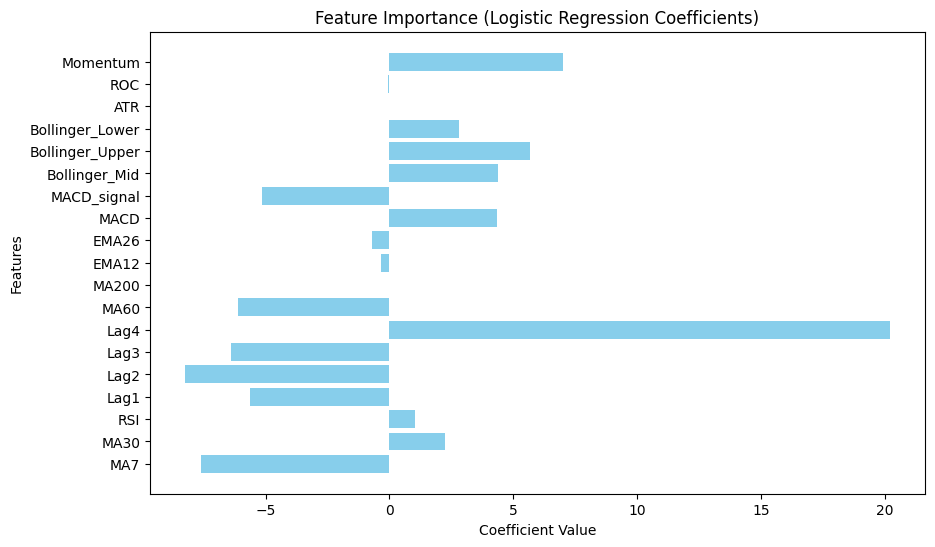

In [ ]:
# import matplotlib.pyplot as plt
# feature_names = X.columns
# coefficients = best_lr_model.coef_[0]

# # Plot feature importance
# plt.figure(figsize=(10, 6))
# plt.barh(feature_names, coefficients, color='skyblue')
# plt.title('Feature Importance (Logistic Regression Coefficients)')
# plt.xlabel('Coefficient Value')
# plt.ylabel('Features')
# plt.show()


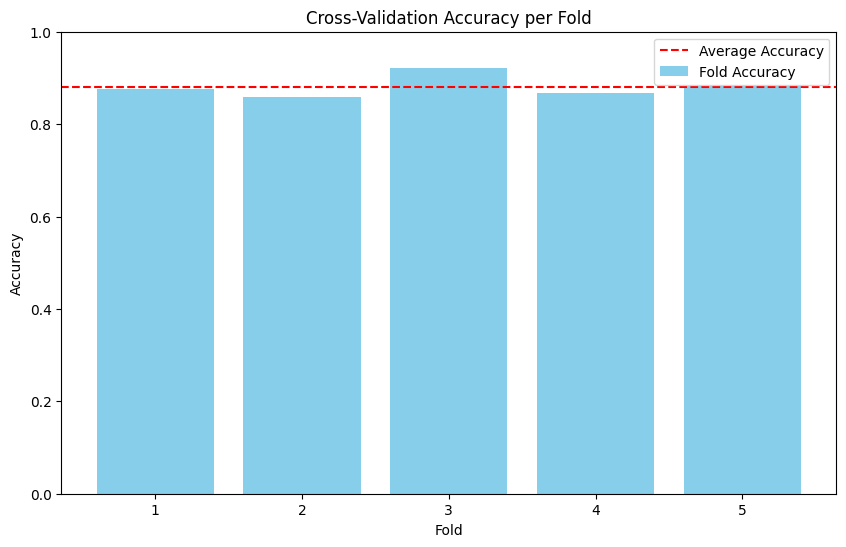

Average Cross-Validation Accuracy: 0.881227127028596


In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
# from sklearn.model_selection import cross_val_score

# # Cross-validation scores
# cv_scores = cross_val_score(lr_model, X_train_scaled, y_train_smote, cv=5)

# # Visualizing the cross-validation scores
# plt.figure(figsize=(10, 6))

# # Plotting individual accuracy scores for each fold
# plt.bar(range(1, len(cv_scores) + 1), cv_scores, color='skyblue', label="Fold Accuracy")

# # Plotting the average accuracy line
# plt.axhline(y=np.mean(cv_scores), color='red', linestyle='--', label="Average Accuracy")
# plt.ylim(0.0, 1.0)
# plt.title('Cross-Validation Accuracy per Fold')
# plt.xlabel('Fold')
# plt.ylabel('Accuracy')
# plt.legend()

# plt.show()

# # Print the average accuracy
# print(f"Average Cross-Validation Accuracy: {np.mean(cv_scores)}")
